**Model datascience**

In dit bestand maak ik het lineaire regressie model voor het voorstellen van een verband tussen de gemiddelde UV index per staat en het aantal melanoom voorkomensten, en het aantal melanoom sterftegevallen. Hiervoor gebruik ik het melanoma.csv dataframe dat ik tijdens de preperation heb gemaakt. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error
import seaborn as sns

Vervolgens gaan we de dataset inladen en de X, Y en Z waardes toekennen aan de melanoom sterftegevallen, melanoom voorkomst, en de UV index respectievelijk. 

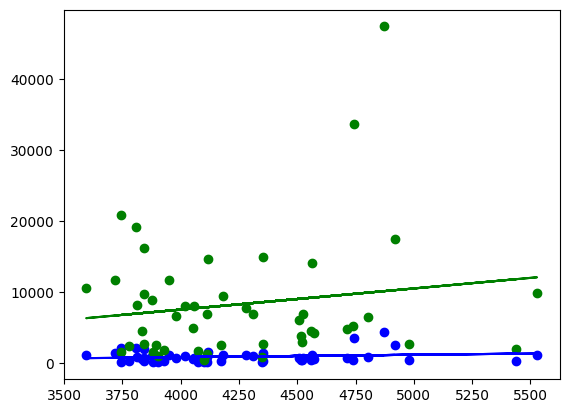

In [3]:
melanoma_df = pd.read_csv('melanoma.csv')

deaths = melanoma_df.iloc[:,1].values.reshape(-1,1)
incidence = melanoma_df.iloc[:,2].values.reshape(-1,1)
UV = melanoma_df.iloc[:,3].values.reshape(-1,1)

lr = LinearRegression()
deaths_model = lr.fit(UV, deaths)
deaths_prediction = lr.predict(UV)
incidence_model = lr.fit(UV, incidence)
incidence_prediction = lr.predict(UV)

plt.scatter(UV, deaths, color = 'blue')
plt.scatter(UV,incidence, color = 'green')
plt.plot(UV, incidence_prediction, color = 'green')
plt.plot(UV, deaths_prediction, color = 'blue')

**R-Squared**

Vervolgens deze regressie evalueren door te kijken naar verschillende metrics van het model. Ik begin hiermee bij de R^2. Dit geeft aan welk deel van de variantie wordt verklaard door de opgegeven parameer (dus ofwel het sterfte aantal of het aantal voorkomsten van melanomen). 

In [4]:
r_squared_deaths = deaths_model.score(UV, deaths)
print(f"R-squared deaths: {r_squared_deaths}")
r_squared_cases = incidence_model.score(UV, incidence)
print(f"R-squared cases: {r_squared_cases}")

R-squared deaths: -76.84983721466926
R-squared cases: 0.024071125643164826


De r-squared waarde van het model wat sterfte aantal met UV index combineert heeft een negatieve waarde. Dit betekend dat het gemiddelde de variatie beter verklaard dan het opgestelde model, dit houdt in dat het geen goed model is. 

De r-squared waarde van het model wat het aantal voorkomsten van melanomen combineert met de uv index, heeft een hele lage waarde (dicht bij de 0). Dit betekend dat het model de variantie iets beter verklaard dan het gemiddelde maar het model verklaard het wel maar voor een erg klein deel. 

**Mean Squared Error (MSE) / Root Mean Squared Error (RSME)**

Hieronder ga ik de mean square error (MSE) berekenen voor beide modellen. Waar R^2 een relatieve maat is voor de fit van een model, is de MSE een absolute maat voor de fit van een model.

In [5]:
print(f"MSE deaths: {mean_squared_error(deaths, deaths_prediction)}")
print(f"RMSE deaths: {math.sqrt(mean_squared_error(deaths, deaths_prediction))}")

print(f"MSE cases: {mean_squared_error(incidence, incidence_prediction)}")
print(f"RMSE cases: {math.sqrt(mean_squared_error(incidence, incidence_prediction))}")

MSE deaths: 702119.4313621582
RMSE deaths: 837.9256717407327
MSE cases: 70598400.0680932
RMSE cases: 8402.285407440835


**Mean Absolute Error (MAE)**

Hieronder ga ik de Mean Absolute Error berekenen. Dit berekend de absolute error waarde, in plaats van de squared waarde van de voorspelling. 

In [6]:
print(f"MAE deaths: {mean_absolute_error(deaths, deaths_prediction)}")
print(f"MAE cases: {mean_absolute_error(incidence, incidence_prediction)}")

MAE deaths: 609.4891825285187
MAE cases: 5863.789337188441


**Exploring Residuals**
Om het model verder te evalueren kunnen we ook kijken naar losse residuals. Deze waardes worden gebaseerd op de waargenomen waardes en de voorspelde waardes. 

/var/folders/mh/245rwzz944s6qpzfjhg8rbwh0000gn/T/ipykernel_70086/2504787481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  residual_deaths_dist = sns.distplot(residual).set(title = "distplot of residuals in deaths model")


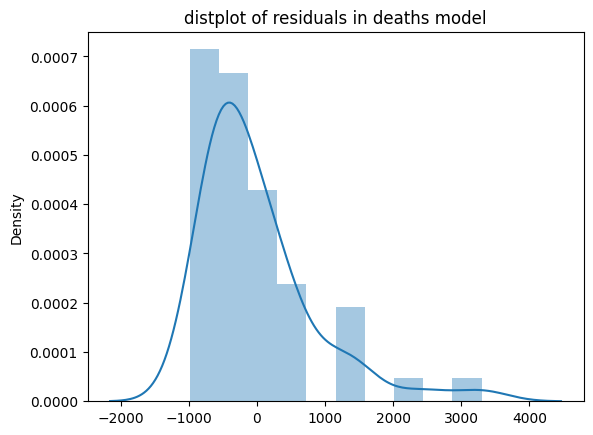

In [27]:
residual_deaths = deaths - deaths_prediction
residual_deaths_dist = sns.distplot(residual).set(title = "distplot of residuals in deaths model")

/var/folders/mh/245rwzz944s6qpzfjhg8rbwh0000gn/T/ipykernel_70086/588171111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  residual_cases_dist = sns.distplot(residual).set(title = "distplot of residuals in incidence model")


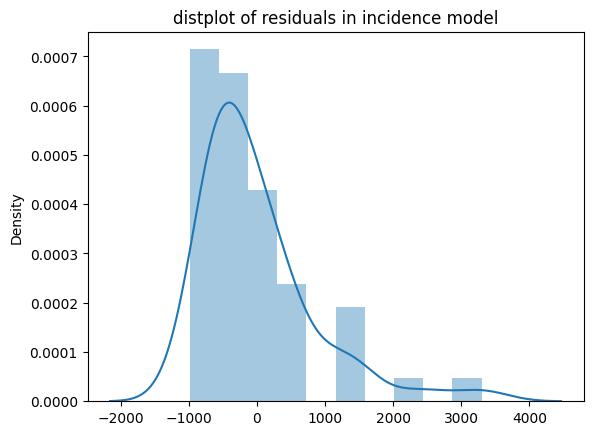

In [32]:
residual_cases = incidence - incidence_prediction
residual_cases_dist = sns.distplot(residual).set(title = "distplot of residuals in incidence model")

Text(0.5, 1.0, 'real vs predicted values (deaths)')

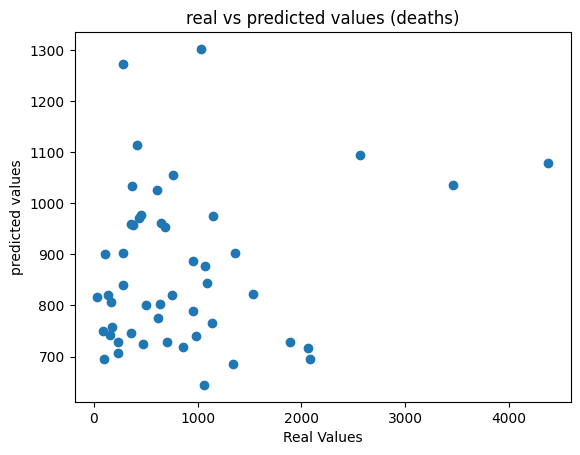

In [38]:
plt.scatter(deaths,deaths_prediction)
plt.xlabel("Real Values")
plt.ylabel("predicted values")
plt.title("real vs predicted values (deaths)")

Text(0.5, 1.0, 'real vs predicted values (incidence)')

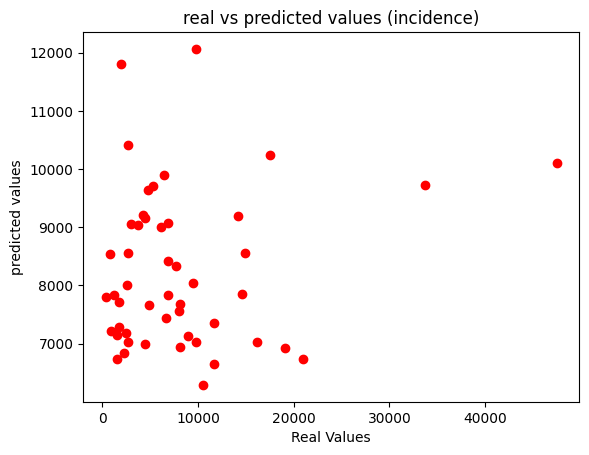

In [37]:
plt.scatter(incidence,incidence_prediction, color = 'red')
plt.xlabel("Real Values")
plt.ylabel("predicted values")
plt.title("real vs predicted values (incidence)")

**Coefficienten en intercepten van de modellen**

Als laatste deel van de evaluatie ga ik kijken naar de coefficienten van het model. 

In [46]:
print(f"Intercept deahts model: {deaths_model.intercept_}")
print(f"Coefficient deaths model: {deaths_model.coef_}")
print(f"Intercept cases model: {incidence_model.intercept_}")
print(f"Coefficient cases model: {incidence_model.coef_}")

Intercept deahts model: [-4435.53549874]
Coefficient deaths model: [[2.98438492]]
Intercept cases model: [-4435.53549874]
Coefficient cases model: [[2.98438492]]
